### Objective
Build a classification model that used Logistic Regression to analyze customer behaviour by predicting which customer clicks on the advertisement:

Independent variable X:
- Name
- Email
- Country
- Time on Facebook
- Estimated Salary (derived from other parameters)

Dependent variable X:
- Clicks (1: custimer clicked on ads, 0: customer did not click on ads)

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
%matplotlib inline

### Data Understanding

In [2]:
ads_df = pd.read_csv("E:\\Bagas's File\\Data Science Bagas\\Material\\ML Regression Course Package\\7. Logisitic Regression\\Facebook_Ads_2.csv", encoding='ISO-8859-1')

In [3]:
ads_df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [4]:
ads_df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [5]:
display(ads_df.shape, ads_df.columns)

(499, 6)

Index(['Names', 'emails', 'Country', 'Time Spent on Site', 'Salary',
       'Clicked'],
      dtype='object')

In [6]:
ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [7]:
ads_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time Spent on Site,499.0,32.920178,9.103455,5.0,26.425044,33.196067,39.114995,60.0
Salary,499.0,52896.992469,18989.183150,20.0,38888.117260,52840.913110,65837.288190,100000.0
Clicked,499.0,0.501002,0.500501,0.0,0.000000,1.000000,1.000000,1.0


In [8]:
ads_df.describe(include='object').T

,count,unique,top,freq
Names,499,497,Seth,2
emails,499,499,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,1
Country,499,210,Israel,6


In [9]:
ads_df['Country'].value_counts()

Country
Israel                                          6
Mauritania                                      6
Bolivia                                         6
Greenland                                       5
Saint Barthélemy                                5
Guinea                                          5
Iraq                                            5
Samoa                                           5
Liechtenstein                                   5
Bhutan                                          5
Kyrgyzstan                                      5
Equatorial Guinea                               5
Algeria                                         5
Laos                                            5
Grenada                                         5
Armenia                                         5
Saint Vincent and The Grenadines                4
Senegal                                         4
Saint Pierre and Miquelon                       4
Marshall Islands                          

In [10]:
ads_df.isnull().sum()

Names                 0
emails                0
Country               0
Time Spent on Site    0
Salary                0
Clicked               0
dtype: int64

In [11]:
ads_df.duplicated().sum()

0

### Explore/Visualize Dataset

C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


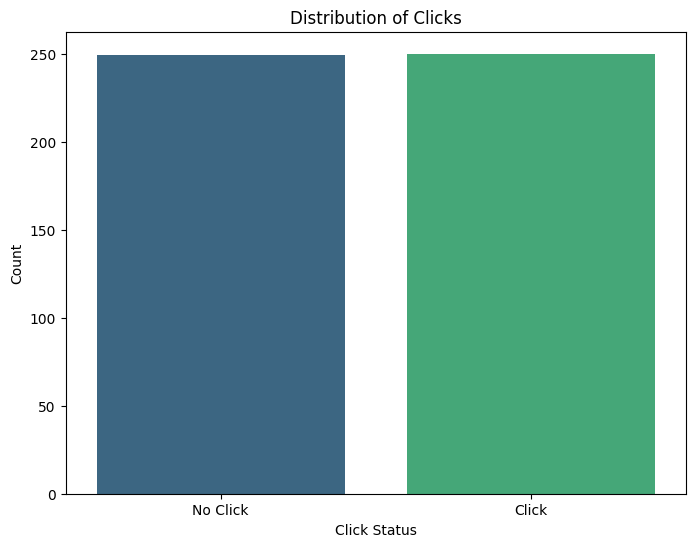

Number of click: 250
Number of no click: 249


In [25]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Clicked', data=ads_df, hue='Clicked', palette='viridis', dodge=False, legend=False)
ax.set_xticks([0, 1])
ax.set_xticklabels(['No Click', 'Click'])
plt.xlabel('Click Status')
plt.ylabel('Count')
plt.title('Distribution of Clicks')
plt.show()

click = ads_df[ads_df['Clicked']==1]
no_click = ads_df[ads_df['Clicked']==0]

print('Number of click:', len(click))
print('Number of no click:', len(no_click))

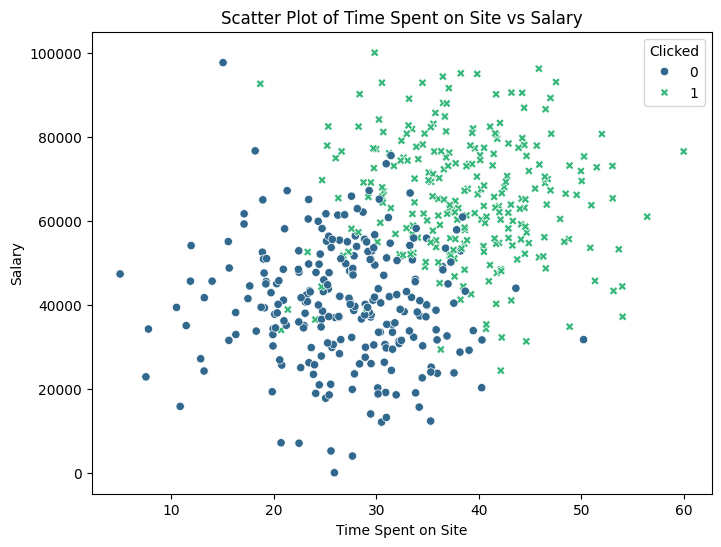

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ads_df, x='Time Spent on Site', y='Salary', hue='Clicked', palette='viridis', style='Clicked')
plt.title('Scatter Plot of Time Spent on Site vs Salary')
plt.xlabel('Time Spent on Site')
plt.ylabel('Salary')
plt.legend(title='Clicked')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15104\3326086787.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.violinplot(x='Clicked', y='Salary', data=ads_df, palette='viridis')


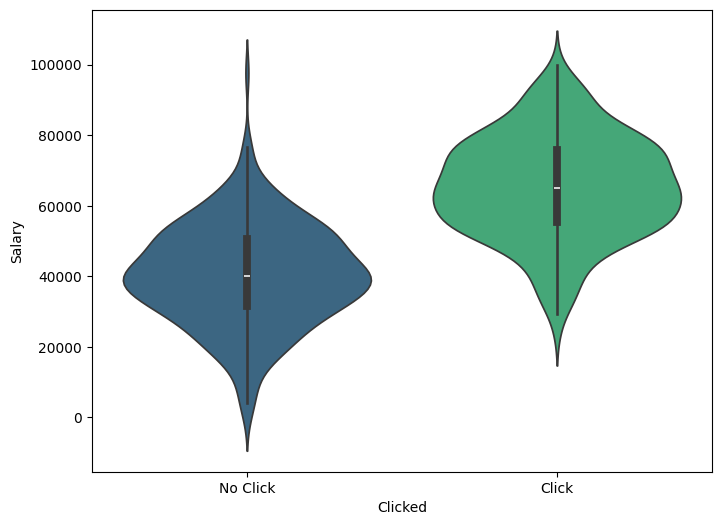

In [16]:
plt.figure(figsize=(8,6))
ax=sns.violinplot(x='Clicked', y='Salary', data=ads_df, palette='viridis')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No Click', 'Click'])
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15104\3212046680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.violinplot(x='Clicked', y='Time Spent on Site', data=ads_df, palette='viridis')


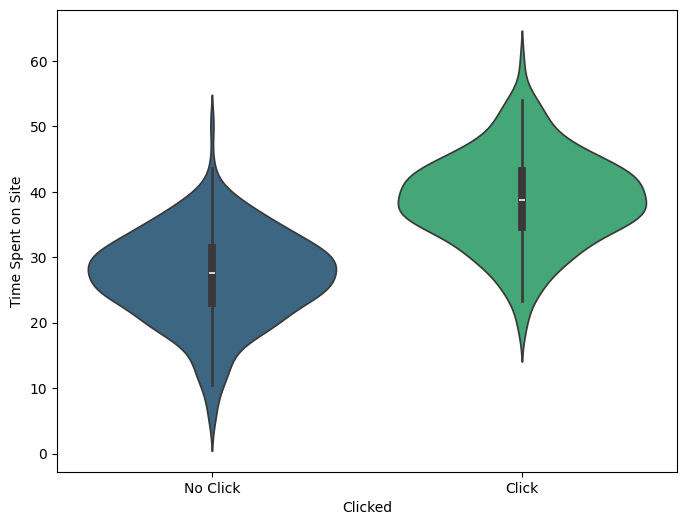

In [18]:
plt.figure(figsize=(8,6))
ax=sns.violinplot(x='Clicked', y='Time Spent on Site', data=ads_df, palette='viridis')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No Click', 'Click'])
plt.show()

<Axes: >

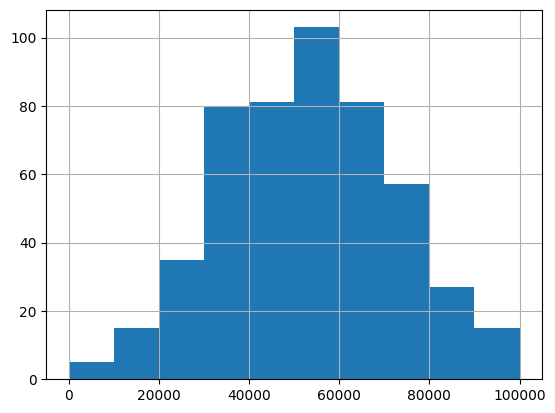

In [24]:
ads_df['Salary'].hist(bins=10)

<Axes: >

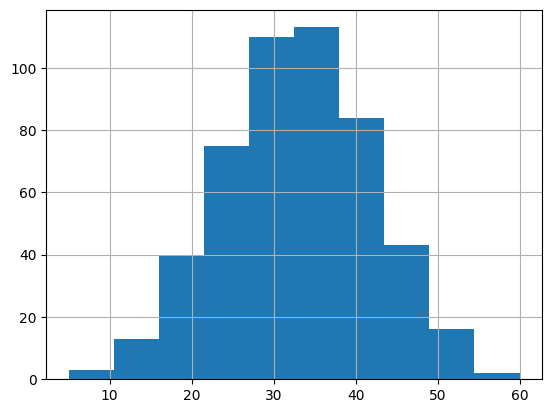

In [22]:
ads_df['Time Spent on Site'].hist(bins=10)

### Data Preparation

In [35]:
from sklearn.preprocessing import StandardScaler

In [30]:
crosstab = pd.crosstab(ads_df['Country'], ads_df['Clicked'])
chi2, p, dof,expected = stats.chi2_contingency(crosstab)
print(f'Country: chi2_stat = {chi2}, p-value = {p}')

Country: chi2_stat = 208.1321651941098, p-value = 0.5039413203605688


In [26]:
ads_df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [31]:
ads_df.drop(['Names','emails','Country'], axis=1, inplace=True)

In [32]:
ads_df.head()

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0


In [33]:
X = ads_df.drop(['Clicked'], axis=1).values
y = ads_df['Clicked'].values

In [34]:
display(X.shape, y.shape)
display(type(X), type(y))

(499, 2)

(499,)

numpy.ndarray

numpy.ndarray

In [37]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [39]:
X

array([[-7.99457658e-01,  1.28257713e-01],
       [-5.10286870e-02,  1.37859159e+00],
       [-1.31666684e+00, -6.21944817e-01],
       [ 2.32223270e+00, -8.30443624e-01],
       [ 1.46195572e-01, -8.19280959e-01],
       [ 2.09908496e+00,  1.46259598e+00],
       [ 1.09531908e+00,  4.75030899e-01],
       [-7.96458904e-01, -1.21483411e+00],
       [ 8.55264296e-01, -9.81324726e-01],
       [-3.55476114e-01, -6.21930555e-01],
       [ 3.87487311e-02,  6.48400206e-02],
       [ 1.77112538e-01, -1.19530208e+00],
       [-8.36398567e-01, -4.81440402e-01],
       [ 1.49769499e+00, -2.23166322e-01],
       [ 5.27406027e-01,  6.21976462e-01],
       [-8.64648371e-01, -1.85222918e+00],
       [ 8.98997888e-01, -1.81000774e-01],
       [-8.97110238e-01, -7.59750031e-01],
       [ 1.75384005e+00, -9.55319376e-01],
       [-5.59287751e-01, -6.60247498e-02],
       [-1.73917217e+00,  4.62029789e-01],
       [-8.05159264e-01,  3.86803184e-02],
       [ 1.02580543e+00, -1.09023371e+00],
       [ 4.

### Model Training

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(399, 2)

(399,)

(100, 2)

(100,)

In [45]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [49]:
y_predict_train = classifier.predict(X_train)

In [50]:
y_predict_train

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,

In [51]:
y_train

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [52]:
y_predict_test = classifier.predict(X_test)

In [54]:
y_predict_test

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [53]:
y_test

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

<Axes: >

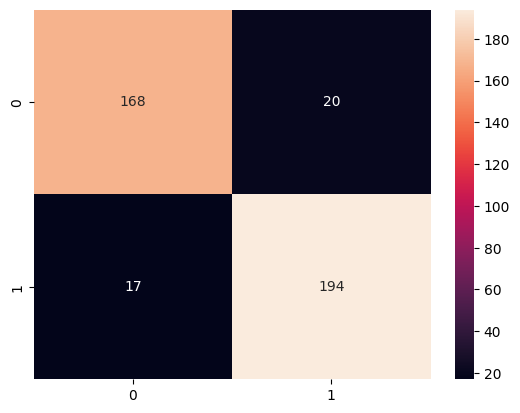

In [56]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt='d')

<Axes: >

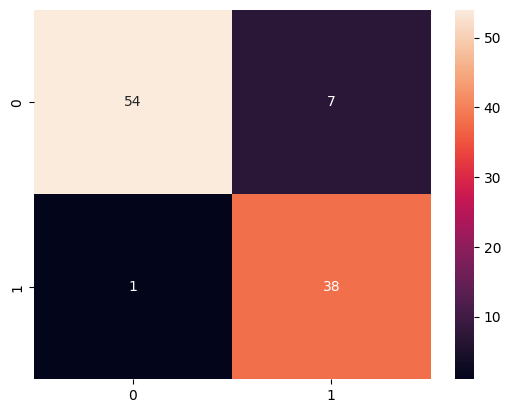

In [57]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt='d')

In [58]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        61
           1       0.84      0.97      0.90        39

    accuracy                           0.92       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.92      0.92       100



### Visualizing Training and Testing Dataset

In [59]:
from matplotlib.colors import ListedColormap

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15104\2791349053.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1], c=ListedColormap(('magenta','blue'))(i), label=j)


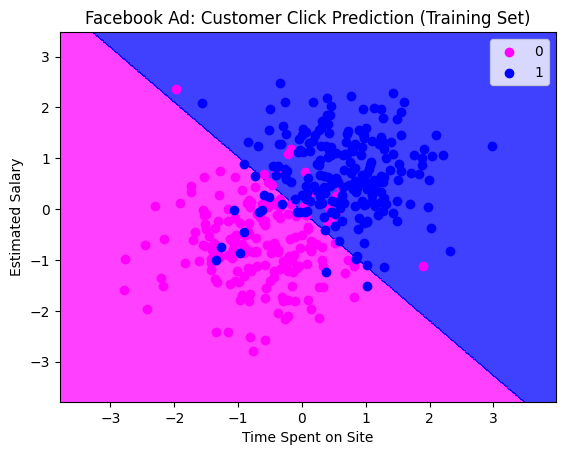

In [62]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() +1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap=ListedColormap(('magenta','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1], c=ListedColormap(('magenta','blue'))(i), label=j)
plt.title('Facebook Ad: Customer Click Prediction (Training Set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15104\3652828461.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1], c=ListedColormap(('magenta','blue'))(i), label=j)


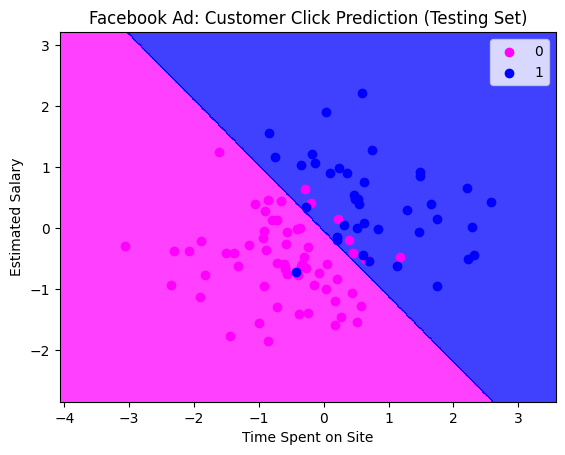

In [63]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() +1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap=ListedColormap(('magenta','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1], c=ListedColormap(('magenta','blue'))(i), label=j)
plt.title('Facebook Ad: Customer Click Prediction (Testing Set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()